In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
%config InlineBackend.figure_format = 'retina'
sns.set_style({'font.family':'sans-serif', 'font.sans-serif':'Arial'})

In [5]:
reads  = pd.read_csv('../data/16p12_lcl_gene_reads_underscores.gct', sep='\t')
tpm    = pd.read_csv('../data/16p12_lcl_gene_tpm_underscores.gct', sep='\t')
mapp   = pd.read_csv('../data/gene_names_mapping_new.tsv', sep='\t')
gtis   = pd.read_csv('../data/GTEx_tissue_expression_SMTSD.tsv', sep='\t')
gtis2  = pd.read_csv('../data/GTEx_tissue_expression_SMTS.tsv', sep='\t')
gpheno = pd.read_csv('/data5/16p12_RNA/GTEx/data/GTEx_v7_Annotations_SampleAttributesDS.txt', sep='\t')


In [6]:
gtis  = gtis.set_index('ensembl')
gtis2 = gtis2.set_index('ensembl')

mapp = mapp.set_index('ensembl', drop=False)

reads['Name'] = reads['Name'].apply(lambda s: s.split('.')[0])
reads = reads.set_index('Name')

tpm['Name'] = tpm['Name'].apply(lambda s: s.split('.')[0])
tpm = tpm.set_index('Name')
tpm = tpm.drop('Description', axis=1)

In [7]:
genes_covered = pd.read_csv('lcl_expressed.txt', sep='\t', header=None)
genes_covered = list(genes_covered[0])

In [8]:
len(genes_covered)

24340

In [9]:
tissues = gtis.columns.tolist()

df = pd.DataFrame(columns = tissues).T
df['total_genes'] = 0
df['genes_covered'] = 0

for tissue in tissues:
    tissue_expressed_genes = gtis[gtis[tissue] == 1].index.tolist()
    df.at[tissue, 'total_genes']   = len(tissue_expressed_genes)
    df.at[tissue, 'genes_covered'] = len(list(set(genes_covered) & set(tissue_expressed_genes)))

df['percent_cov'] = df['genes_covered'] / df['total_genes']
df['tissue'] = df.index.to_series()

In [10]:
df = df[df.tissue.apply(lambda s: s.startswith('Brain'))]

In [11]:
df.tissue = df.tissue.apply(lambda s: s[8:])

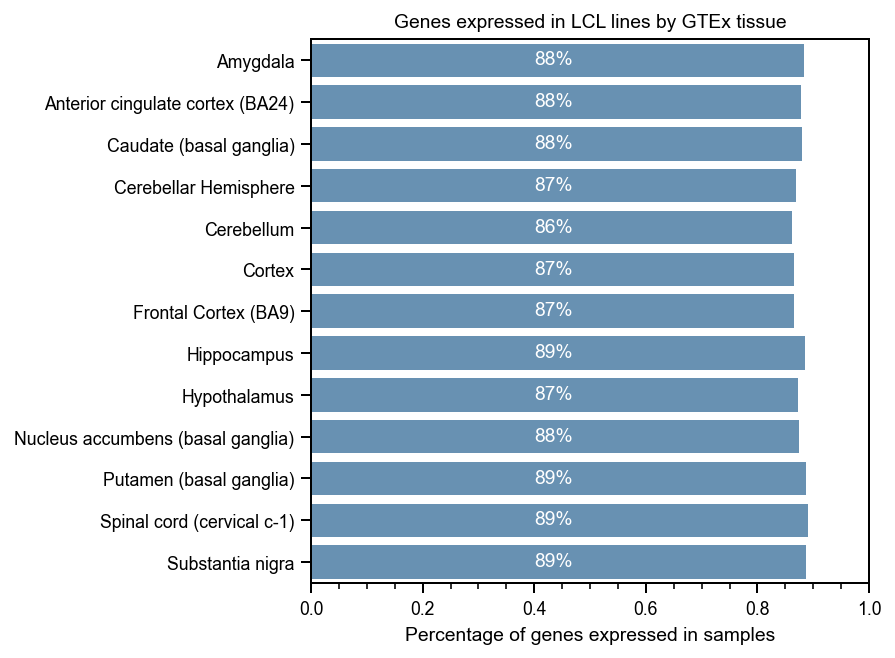

In [12]:
plt.figure(figsize=(5,5))
sns.set_context('paper', font_scale=1)

g = sns.barplot(
    data=df, 
    x='percent_cov', 
    y='tissue',
    color='#5C92BE'
)

g.set_ylabel(None)
g.set_xlabel('Percentage of genes expressed in samples')
g.set_title('Genes expressed in LCL lines by GTEx tissue')

g.set_xlim([0,1])
g.get_xaxis().set_major_locator(matplotlib.ticker.MultipleLocator(.2))
g.get_xaxis().set_minor_locator(matplotlib.ticker.MultipleLocator(.05))


for i in range(len(df.index)):
    ind = df.index[i]
    text = '{0:.0%}'.format(df.at[ind, 'percent_cov'])
    g.text(.4, i+.1, text, color='white')
    
# plt.tight_layout(1.5)
plt.savefig('figures/S2b_GTEx_bar.pdf', dpi=300)